# Stable Diffusion 🎨

Stable Diffusion is a text-to-image latent diffusion model created by the researchers and engineers from [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/), and [LAION](https://laion.ai/). It's trained on 512x512 images from a subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) database. This model uses a frozen CLIP ViT-L/14 text encoder to condition the model on text prompts. With its 860M UNet and 123M text encoder, the model is relatively lightweight and runs on a GPU with at least 10GB VRAM.

## Getting Started

Install this notebook's requirements and download the pre-trained model from Hugging Face.

In [2]:
%pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-rfjyyzkb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-rfjyyzkb
  Resolved https://github.com/huggingface/diffusers.git to commit 8d326e61cfbe5d76e25deca6093ecb22967d634e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
from huggingface_hub import HfFolder
from os import environ

token = environ.get("HUGGING_FACE_TOKEN")
HfFolder.save_token(token)

In [4]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
device = "cuda"
pipe = pipe.to(device)

Fetching 12 files: 100%|██████████| 12/12 [00:00<00:00, 10833.33it/s]


## Create New Art

Update `prompt` and run the cell to create art!

100%|██████████| 50/50 [00:11<00:00,  4.39it/s]


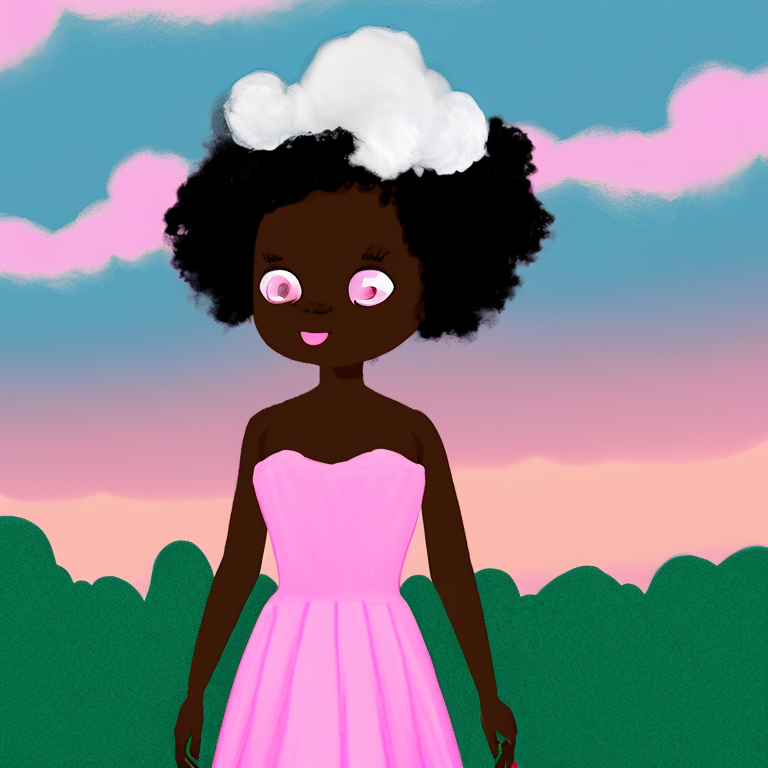

In [13]:
from torch import autocast

# Change prompt for image here!
prompt = "a cartoon black girl with cotton candy hair and a pink dress standing in front of a pink sky with cotton candy clouds"
with autocast(device):
  image = pipe(prompt, height=768, width=768).images[0]
image